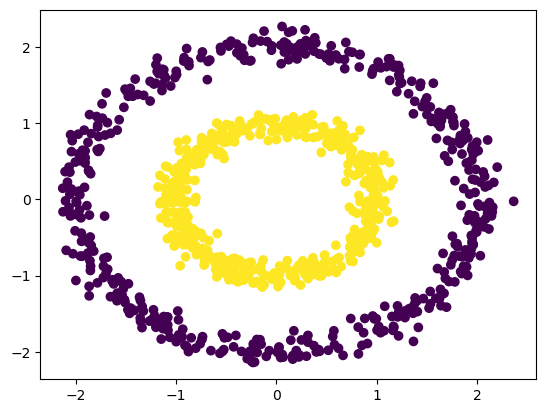

TypeError: __init__() got an unexpected keyword argument 'model'

In [24]:
from tqdm import tqdm
from Lib import *
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X, y = Dataset(mode="NL", dist="Circular", num_points=1000, r1=1, r2=2, frac=0.5, noise_mag = 0.1).get_data()
y[np.where(y == -1)] = 0
y = y.astype(int)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()
bs = BatchSampler(X.T, y)
loss_fn = NLL()
accuracies = []
norms= []
nn = FFNN(
    [
        Affine(2, 10),
        Sigmoid(),
        Affine(10, 2),
    ],
    weight_scale=0.1
)
optimizer = SGD(model=nn, lr=1e-2)
for epoch in tqdm(range(100)):  
    batches = bs(batch_size = 50)
    for b in (batches):
        out = nn.forward(b[0])
        loss, dout = loss_fn(out, b[1], mode='train')
        dx = nn.backward(dout)
        optimizer.step()
    accuracies.append(accuracy(nn, X.T, y))
        
print("Training Accuracy: ", accuracy(nn,X.T, y))
plt.plot(accuracies)
plt.show()
plot_contour_NN(nn, X.T, y, "Nlinear")